This notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import numpy as np
print (" Hello Capstone Project Course!")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 Hello Capstone Project Course!


# Introduction/Business Problem
Breast cancer is the most common cancer diagnosed in women in several countries (Ref American Cancer Society).
It is a cancer that forms in the cells of the breasts. 
Mammography screening for breast cancer is at present the most effective method in reducing breast cancer mortality. 
A lot of unnecessary   surgery arises from false positives arising from mammogram results. 
This capstone aim to apply several supervised machine learning techniques to identify if a mass lesion is malign or benign.It will help any stakeholder(radiologist,doctor,patient)build a better way to interpret the mammogram results and improve a lot of lives.


# Data
The UCI repository made public a dataset called mammographic_masses.(source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)
It contains 961 instances of masses detected in mammograms, with the following attributes:
1.	BI-RADS assessment of the breast density: 1 to 5 (ordinal).This attribute show how confident the severity classification is; it is not a "predictive" attribute 
2.	Age: patient's age in years (integer)
3.	Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4.	Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5.	Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6.	Severity: benign=0 or malignant=1 (binominal)
    Severity is the classification that our ML will attempt to predict based on those attributes above.



Loading dataset


In [2]:
import pandas as pd

masses_mamo_data = pd.read_csv('mammographic_masses.data.txt')
masses_mamo_data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


# Methodology to choose to predict the severity

In [3]:
masses_mamo_data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_mamo_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [4]:
masses_mamo_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [5]:
masses_mamo_data.loc[(masses_mamo_data['age'].isnull()) |
              (masses_mamo_data['shape'].isnull()) |
              (masses_mamo_data['margin'].isnull()) |
              (masses_mamo_data['density'].isnull())]

,BI-RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
9,5.0,60.0,NaN,5.0,1.0,1
12,4.0,64.0,1.0,NaN,3.0,0
19,4.0,40.0,1.0,NaN,NaN,0
20,NaN,66.0,NaN,NaN,1.0,1
22,4.0,43.0,1.0,NaN,NaN,0


In [6]:
masses_mamo_data.dropna(inplace=True)
masses_mamo_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


# Data Analysis

In [7]:
masses_mamo_data.groupby('severity')["shape"].mean()

severity
0    2.100703
1    3.503722
Name: shape, dtype: float64

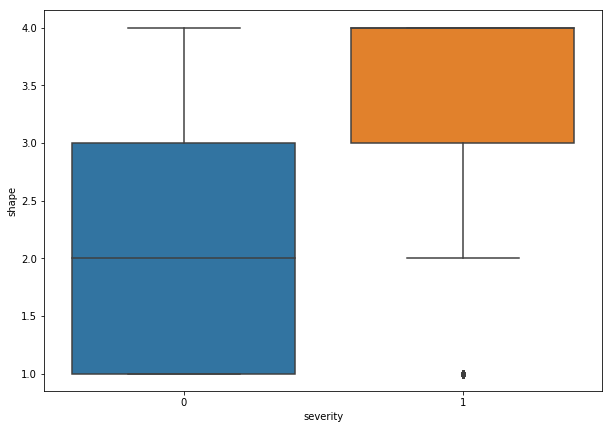

In [8]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "severity", y = "shape", data = masses_mamo_data)

In [9]:
masses_mamo_data.groupby('severity')["margin"].mean()

severity
0    1.939110
1    3.739454
Name: margin, dtype: float64

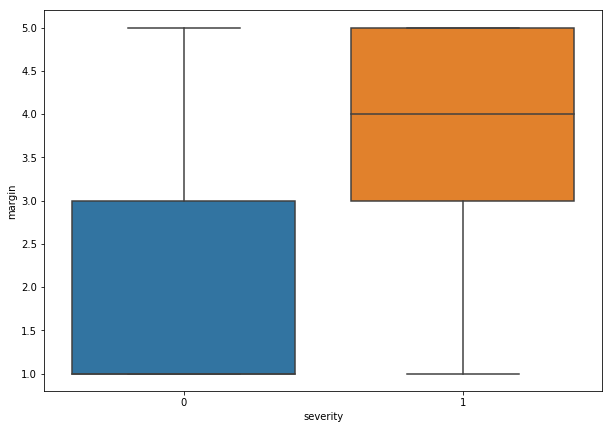

In [10]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "severity", y = "margin", data = masses_mamo_data)

In [11]:
masses_mamo_data['age_by_decade'] = pd.cut(x=masses_mamo_data['age'], bins=[20, 29, 39, 49,59,69,79,89,99], labels=['20s', '30s', '40s','50s','60s','70s','80s','90s'])
#sns.boxplot(x = masses_mamo_data['age_by_decade'], y = masses_mamo_data['severity'])

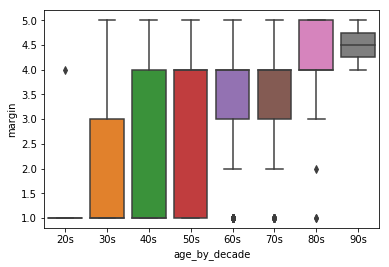

In [12]:
sns.boxplot(x = masses_mamo_data['age_by_decade'], y = masses_mamo_data['margin'])

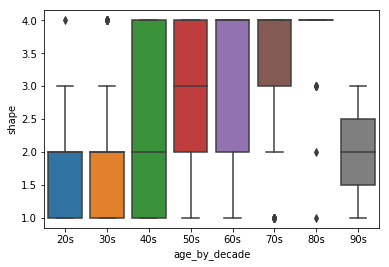

In [13]:
sns.boxplot(x = masses_mamo_data['age_by_decade'], y = masses_mamo_data['shape'])

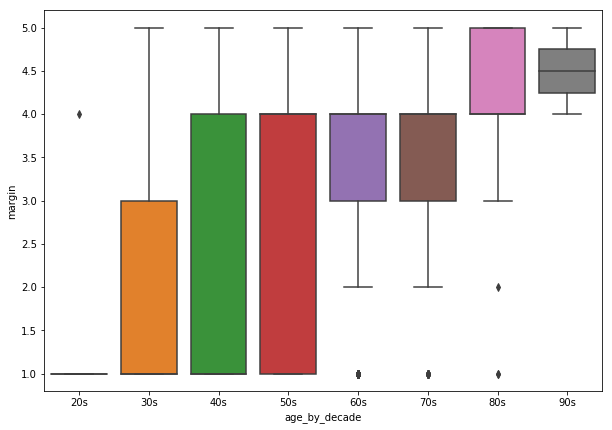

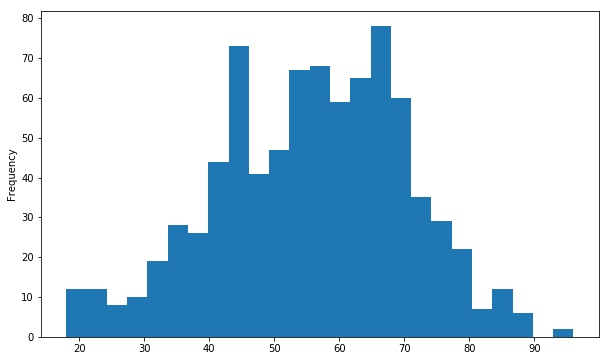

In [65]:
masses_mamo_data['age'].plot.hist(bins = 25, figsize = (10,6))

In [ ]:
# convert the Pandas dataframes into numpy arrays

In [14]:
features =masses_mamo_data[['age', 'shape',
                             'margin', 'density']].values


classes =masses_mamo_data['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

features

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [15]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)
cv_scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8073583532737221

# KNN

Write a for loop to run KNN with K values ranging from 1 to 80 to see from whic value K make a difference

In [17]:
from sklearn import neighbors 
for n in range(1, 100):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)
    print (n, cv_scores.mean())

1 0.7239123742356184
2 0.6889838098036746
3 0.7541080699103032
4 0.7300813008130081
5 0.7735464506108056
6 0.7626163189342738
7 0.7940595133145824
8 0.7747082406280172
9 0.7880200243482641
10 0.7854795488574507
11 0.7915333809104012
12 0.7794257168045002
13 0.7819084701174035
14 0.7915039950743742
15 0.7878748443250353
16 0.7794411093852764
17 0.7818073688482151
18 0.775681121699341
19 0.7805147418944068
20 0.7828666582707136
21 0.7853927906748946
22 0.7817342540895289
23 0.7805588206484475
24 0.780587506821712
25 0.7878171221471251
26 0.7866269957880302
27 0.7854365195975539
28 0.7902271105327232
29 0.7865979597833844
30 0.7878314652337574
31 0.7914172368918182
32 0.7878314652337574
33 0.7865976099520032
34 0.7866119530386354
35 0.7866262961252677
36 0.7854358199347914
37 0.7866843681345592
38 0.7866553321299133
39 0.7878891874116676
40 0.7854791990260694
41 0.7854645061080558
42 0.7818500482767305
43 0.7830692106404713
44 0.783054867553839
45 0.783054867553839
46 0.7854648559394373
4

# Naive Baises

 naive_bayes.MultinomialNB

In [19]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minmax, classes, cv=10)

cv_scores.mean()

0.7844055665169388

# Decision Trees

In [20]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(features_scaled, classes, train_size=0.75, random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

# use K-Fold cross validation to get a better measure of our model's accuracy (K=10)

In [24]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)

cv_scores.mean()



0.7373123154639465

# try a RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)

cv_scores.mean()

0.7528157927878762

# try using svm.SVC with a linear kernel.

In [27]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)
cv_scores = cross_val_score(svc, features_scaled, classes, cv=10)

cv_scores.mean()

0.7964988875362076

In [28]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc,features_scaled, classes, cv=10)
cv_scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

0.8012023704574396

In [29]:
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc, features_scaled,classes, cv=10)
cv_scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

0.7351055791108685

In [31]:
C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, features_scaled, classes, cv=10)
cv_scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

0.792753942599667